<a href="https://colab.research.google.com/github/YugyeongJo/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## wordcloud regexp quest

In [42]:
import pandas as pd
import numpy as np

### 한글처리

In [31]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### Excel 불러오기

In [32]:
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name=None)

In [33]:
df_sheets = []
for sheet_name, df in df_OWG.items():
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass


len(df_sheets)

2월, <class 'pandas.core.frame.DataFrame'>
1월, <class 'pandas.core.frame.DataFrame'>
12월, <class 'pandas.core.frame.DataFrame'>


3

In [60]:
df_sheets_mine01 = df_sheets[0].iloc[9].dropna()
df_sheets_mine02 = df_sheets[1].iloc[9].dropna()
df_sheets_mine03 = df_sheets[2].iloc[9].dropna()
df_sheets_mine = pd.concat([df_sheets_mine01,df_sheets_mine02,df_sheets_mine03], axis=0)
df_sheets_mine

                                                                     조유경
2024-02-14 00:00:00    Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나...
2024-02-13 00:00:00    Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 ...
2024-02-07 00:00:00    p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np...
2024-02-06 00:00:00    대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는...
2024-02-05 00:00:00    cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형...
2024-02-02 00:00:00    EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터...
2024-02-01 00:00:00    query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메...
                                                                     조유경
2024-01-31 00:00:00          pivot_table\n데이터프레임의 데이터를 재구조화하여 요약된 형태로 표시
2024-01-30 00:00:00    to_datetime\npandas에서 datatype을 datetime 형식으로 ...
2024-01-29 00:00:00    sort_values\n전처리 작업 시 데이터프레임에서 특정 열을 기준으로 데이터를...
2024-01-26 00:00:00    DataFrame\n여러개의 series가 모여있는 다변수의 구성으로 column이...
1월 25일                 fetch\n네트워크 요청을 보내고 응답을 받아오는

### 데이터전처리

#### values 연습

In [65]:
df_sheets_mine_values = df_sheets_mine.values.tolist()
df_sheets_mine_values

['조유경',
 'Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나로 문제와 정답을 모두 알려주고 학습시키는 방법입니다.\n데이터의 패턴을 파악하여 예측값을 구하기 위해 사용됩니다.  \n',
 'Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 직선을 찾는 방법이다. \n두 변수 사이의 관계를 분석하거나 예측하는 데 사용되며, 모델의 구조가 간단하고 해석하기 쉬운반면 복잡한 상호작용을 고려해야하는 데이터의 경우 한계를 가진다. \n',
 'p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np-value가 유의수준이하일때 귀무 가설을 기각하고 대립가설을 채택하게 된다.\n가설이 통계적으로 유의미한지를 판단하고, 변수 간의 관계가 유의미한지 등을 판단하기 위해 사용한다.  ',
 '대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는 가설입니다.\n귀무가설이 채택되지 않았을때 채택되며, 주장하고자 하는 바를 수치적으로 증명하기 위해 사용된다.',
 'cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형 데이터로 바꿔줄 때 사용되며, 데이터들을 구간별로 쪼개어 나누어줄 때 사용합니다. ',
 'EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터를 통해 도출해낼 수 있는 인사이트를 탐색하기 위한 데이터분석 방법입니다.\n데이터를 통해 인사이트 도출을 함으로써 비즈니스에 도움을 주기 위해 사용되기 때문에 시각화를 적극 활용한 설득을 위해 사용됩니다.  \n',
 'query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메소드입니다.\nquery는 문자열 표현식을 사용하기 때문에 복잡한 조건을 보다 쉽게 활용할 수 있습니다.',
 '조유경',
 'pivot_table\n데이터프레임의 데이터를 재구조화하여 요약된 형태로 표시',
 'to_datetime\npa

In [66]:
text = ' '.join(df_sheets_mine_values)
text

'조유경 Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나로 문제와 정답을 모두 알려주고 학습시키는 방법입니다.\n데이터의 패턴을 파악하여 예측값을 구하기 위해 사용됩니다.  \n Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 직선을 찾는 방법이다. \n두 변수 사이의 관계를 분석하거나 예측하는 데 사용되며, 모델의 구조가 간단하고 해석하기 쉬운반면 복잡한 상호작용을 고려해야하는 데이터의 경우 한계를 가진다. \n p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np-value가 유의수준이하일때 귀무 가설을 기각하고 대립가설을 채택하게 된다.\n가설이 통계적으로 유의미한지를 판단하고, 변수 간의 관계가 유의미한지 등을 판단하기 위해 사용한다.   대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는 가설입니다.\n귀무가설이 채택되지 않았을때 채택되며, 주장하고자 하는 바를 수치적으로 증명하기 위해 사용된다. cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형 데이터로 바꿔줄 때 사용되며, 데이터들을 구간별로 쪼개어 나누어줄 때 사용합니다.  EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터를 통해 도출해낼 수 있는 인사이트를 탐색하기 위한 데이터분석 방법입니다.\n데이터를 통해 인사이트 도출을 함으로써 비즈니스에 도움을 주기 위해 사용되기 때문에 시각화를 적극 활용한 설득을 위해 사용됩니다.  \n query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메소드입니다.\nquery는 문자열 표현식을 사용하기 때문에 복잡한 조건을 보다 쉽게 활용할 수 있습니다. 조유경 pivot_table\n데이터프레임의 데이터를 재구조화하여 요약된 형태로 표시 to_datetime\npandas에서 datatype을 datetime 형식으로 변환하는  메소드입

#### 다른 방법

In [63]:
df_sheets_mine_nonmissingvalue = df_sheets_mine.dropna()
df_sheets_mine_nonmissingvalue

                                                                     조유경
2024-02-14 00:00:00    Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나...
2024-02-13 00:00:00    Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 ...
2024-02-07 00:00:00    p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np...
2024-02-06 00:00:00    대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는...
2024-02-05 00:00:00    cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형...
2024-02-02 00:00:00    EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터...
2024-02-01 00:00:00    query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메...
                                                                     조유경
2024-01-31 00:00:00          pivot_table\n데이터프레임의 데이터를 재구조화하여 요약된 형태로 표시
2024-01-30 00:00:00    to_datetime\npandas에서 datatype을 datetime 형식으로 ...
2024-01-29 00:00:00    sort_values\n전처리 작업 시 데이터프레임에서 특정 열을 기준으로 데이터를...
2024-01-26 00:00:00    DataFrame\n여러개의 series가 모여있는 다변수의 구성으로 column이...
1월 25일                 fetch\n네트워크 요청을 보내고 응답을 받아오는

In [64]:
text = ' '.join(df_sheets_mine_nonmissingvalue)
text

'조유경 Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나로 문제와 정답을 모두 알려주고 학습시키는 방법입니다.\n데이터의 패턴을 파악하여 예측값을 구하기 위해 사용됩니다.  \n Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 직선을 찾는 방법이다. \n두 변수 사이의 관계를 분석하거나 예측하는 데 사용되며, 모델의 구조가 간단하고 해석하기 쉬운반면 복잡한 상호작용을 고려해야하는 데이터의 경우 한계를 가진다. \n p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np-value가 유의수준이하일때 귀무 가설을 기각하고 대립가설을 채택하게 된다.\n가설이 통계적으로 유의미한지를 판단하고, 변수 간의 관계가 유의미한지 등을 판단하기 위해 사용한다.   대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는 가설입니다.\n귀무가설이 채택되지 않았을때 채택되며, 주장하고자 하는 바를 수치적으로 증명하기 위해 사용된다. cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형 데이터로 바꿔줄 때 사용되며, 데이터들을 구간별로 쪼개어 나누어줄 때 사용합니다.  EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터를 통해 도출해낼 수 있는 인사이트를 탐색하기 위한 데이터분석 방법입니다.\n데이터를 통해 인사이트 도출을 함으로써 비즈니스에 도움을 주기 위해 사용되기 때문에 시각화를 적극 활용한 설득을 위해 사용됩니다.  \n query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메소드입니다.\nquery는 문자열 표현식을 사용하기 때문에 복잡한 조건을 보다 쉽게 활용할 수 있습니다. 조유경 pivot_table\n데이터프레임의 데이터를 재구조화하여 요약된 형태로 표시 to_datetime\npandas에서 datatype을 datetime 형식으로 변환하는  메소드입

#### 조사빼기

In [93]:
# 조사 빼기
import re
patterns = '(조유경|사용됩니다 |위해 |중|보다 |때 |가장 |잘 |이다 |시키 |을 |입니다 |\n|와 |두 |는 |모두 |가 |과 |은 |에 |이 |로 |의 |\.)'
text_regex = re.sub(pattern=patterns, repl=' ', string=text)
text_regex

'  Supervised Learning 지도 학습 머신러닝 학습시키 방식   하나 문제 정답  알려주고 학습시키 방법입니다  데이터 패턴 파악하여 예측값 구하기  사용됩니다     Linear Regression 선형회귀분석 데이터 경향성   설명하 직선 찾 방법이다    변수 사이 관계를 분석하거나 예측하 데 사용되며, 모델 구조 간단하고 해석하기 쉬운반면 복잡한 상호작용 고려해야하 데이터 경우 한계를 가진다    p-value 관찰된 데이터 이상 극단적인 결과를 얻 확률 의미한다   p-value 유의수준이하일 귀무 가설 기각하고 대립가설 채택하게 된다  가설 통계적으 유의미한지를 판단하고, 변수 간 관계 유의미한지 등 판단하기  사용한다    대립가설 귀무가설 대조되 가설 특정한 관계나 차이 존재하다 것 주장하 가설입니다  귀무가설 채택되지 않았을 채택되며, 주장하고자 하 바를 수치적으 증명하기  사용된다  cut() 데이터를 구간 길이 따라 나누 함수이다   연속형 데이터를 범주형 데이터 바꿔줄  사용되며, 데이터들 구간별 쪼개어 나누어줄  사용합니다   EDA(탐색 데이터 분석, Exploratory Data Analysis) 데이터를 통해 도출해낼 수 있 인사이트를 탐색하기 위한 데이터분석 방법입니다  데이터를 통해 인사이트 도출 함으로써 비즈니스 도움 주기  사용되기 때문 시각화를 적극 활용한 설득  사용됩니다     query dataframe에서 data를 특정조건 따라 필터링할 사용되 메소드입니다  query 문자열 표현식 사용하기 때문 복잡한 조건  쉽게 활용할 수 있습니다    pivot_table 데이터프레임 데이터를 재구조화하여 요약된 형태 표시 to_datetime pandas에서 datatype datetime 형식으 변환하  메소드입니다   다양한 형식으 되어있 날짜/시간 데이터를 표준적인 datetime 형식으 변환하는데 사용됩니다    sort_values 전처리 작업 시 데이터프레임에서 특정 열 기준으 데이터를 정렬하 메서

In [94]:
text_split = text_regex.split()
text_split[:30], len(text_split)
text_split[:30]

['Supervised',
 'Learning',
 '지도',
 '학습',
 '머신러닝',
 '학습시키',
 '방식',
 '하나',
 '문제',
 '정답',
 '알려주고',
 '학습시키',
 '방법입니다',
 '데이터',
 '패턴',
 '파악하여',
 '예측값',
 '구하기',
 '사용됩니다',
 'Linear',
 'Regression',
 '선형회귀분석',
 '데이터',
 '경향성',
 '설명하',
 '직선',
 '찾',
 '방법이다',
 '변수',
 '사이']

In [95]:
from collections import Counter
text_split_count = Counter(text_split[:30])

### wordcloud


In [96]:
from wordcloud import WordCloud

In [97]:
wordCloud = WordCloud(background_color='white'
                    , font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordCloud.generate_from_frequencies(text_split_count)  # split하기 전 값을 넣어주면 됨.

In [98]:
wordCloud.words_

{'학습시키': 1.0,
 '데이터': 1.0,
 'Supervised': 0.5,
 'Learning': 0.5,
 '지도': 0.5,
 '학습': 0.5,
 '머신러닝': 0.5,
 '방식': 0.5,
 '하나': 0.5,
 '문제': 0.5,
 '정답': 0.5,
 '알려주고': 0.5,
 '방법입니다': 0.5,
 '패턴': 0.5,
 '파악하여': 0.5,
 '예측값': 0.5,
 '구하기': 0.5,
 '사용됩니다': 0.5,
 'Linear': 0.5,
 'Regression': 0.5,
 '선형회귀분석': 0.5,
 '경향성': 0.5,
 '설명하': 0.5,
 '직선': 0.5,
 '찾': 0.5,
 '방법이다': 0.5,
 '변수': 0.5,
 '사이': 0.5}

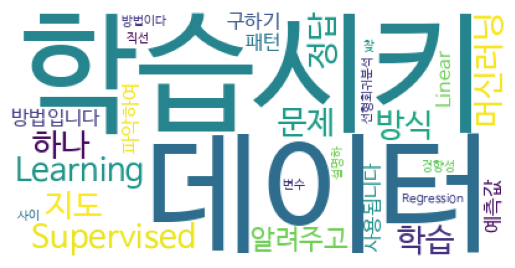

In [99]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()